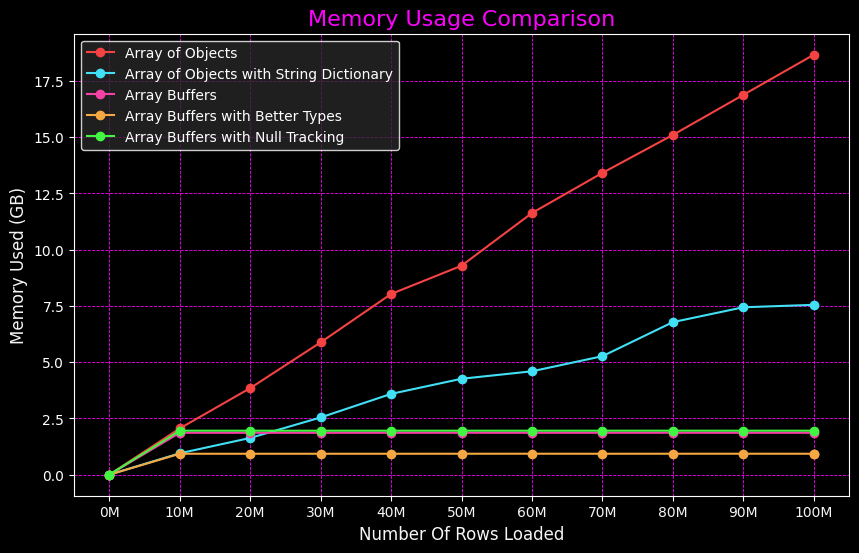

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV files
array_of_objects_df = pd.read_csv("/home/jack/code/df.ts/stats/arrayOfObjects_100000000.csv")
array_of_objects_string_dict_df = pd.read_csv("/home/jack/code/df.ts/stats/arrayOfObjectsStringDictionary_100000000.csv")
array_buffer_df = pd.read_csv("/home/jack/code/df.ts/stats/arrayBuffer_100000000.csv")
array_buffer_better_types_df = pd.read_csv("/home/jack/code/df.ts/stats/arrayBufferBetterTypes_100000000.csv")
#stats/arrayBufferWithNullTracking_100000000.csv
array_buffer_with_null_tracking_df = pd.read_csv("/home/jack/code/df.ts/stats/arrayBufferWithNullTracking_100000000.csv")
# polars_df = pd.read_csv("/home/jack/code/df.ts/stats/polars_100000000.csv")

array_of_objects_df['heapUsed_GB'] = array_of_objects_df['heapUsed'] / (1024 ** 3)
array_of_objects_df['rows_millions'] = array_of_objects_df['rows'] / 10_000_000

# Convert 'heapUsed' from bytes to gigabytes
array_of_objects_string_dict_df['heapUsed_GB'] = array_of_objects_string_dict_df['heapUsed'] / (1024 ** 3)
array_of_objects_string_dict_df['rows_millions'] = array_of_objects_string_dict_df['rows'] / 10_000_000

array_buffer_df['arrayBuffers_GB'] = array_buffer_df['arrayBuffers'] / (1024 ** 3)
array_buffer_df['rows_millions'] = array_buffer_df['rows'] / 10_000_000

array_buffer_better_types_df['arrayBuffers_GB'] = array_buffer_better_types_df['arrayBuffers'] / (1024 ** 3)
array_buffer_better_types_df['rows_millions'] = array_buffer_better_types_df['rows'] / 10_000_000

array_buffer_with_null_tracking_df['arrayBuffers_GB'] = array_buffer_with_null_tracking_df['arrayBuffers'] / (1024 ** 3)
array_buffer_with_null_tracking_df['rows_millions'] = array_buffer_with_null_tracking_df['rows'] / 10_000_000

# Filter data to include only rows where 'rows_millions' is a whole number (multiples of 10 million)
array_of_objects_df = array_of_objects_df[array_of_objects_df['rows'] % 10_000_000 == 0]
array_of_objects_string_dict_df = array_of_objects_string_dict_df[array_of_objects_string_dict_df['rows'] % 10_000_000 == 0]
array_buffer_df = array_buffer_df[array_buffer_df['rows'] % 10_000_000 == 0]
array_buffer_better_types_df = array_buffer_better_types_df[array_buffer_better_types_df['rows'] % 10_000_000 == 0]
array_buffer_with_null_tracking_df = array_buffer_with_null_tracking_df[array_buffer_with_null_tracking_df['rows'] % 10_000_000 == 0]

# Apply Synthwave-style customizations
plt.style.use('dark_background')

plt.figure(figsize=(10, 6))

# Plot data with synthwave colors
plt.plot(array_of_objects_df['rows_millions'], array_of_objects_df['heapUsed_GB'], marker='o', linestyle='-', color='#f54242', label='Array of Objects')
plt.plot(array_of_objects_string_dict_df['rows_millions'], array_of_objects_string_dict_df['heapUsed_GB'], marker='o', linestyle='-', color='#42e0f5', label='Array of Objects with String Dictionary')
plt.plot(array_buffer_df['rows_millions'], array_buffer_df['arrayBuffers_GB'], marker='o', linestyle='-', color='#f542a7', label='Array Buffers')
plt.plot(array_buffer_better_types_df['rows_millions'], array_buffer_better_types_df['arrayBuffers_GB'], marker='o', linestyle='-', color='#f5a742', label='Array Buffers with Better Types')
plt.plot(array_buffer_with_null_tracking_df['rows_millions'], array_buffer_with_null_tracking_df['arrayBuffers_GB'], marker='o', linestyle='-', color='#42f542', label='Array Buffers with Null Tracking')

# Add labels and title with contrasting synthwave colors
plt.xlabel('Number Of Rows Loaded', fontsize=12, color='#f5f5f5')
plt.ylabel('Memory Used (GB)', fontsize=12, color='#f5f5f5')
plt.title('Memory Usage Comparison', fontsize=16, color='#ff00ff')

# Set x-axis ticks from 0 to 100 million rows
plt.xticks(ticks=range(0, 11), labels=[f'{i*10}M' for i in range(11)], fontsize=10, color='#f5f5f5')

# Add legend with a custom background and border color
legend = plt.legend(loc='upper left', fontsize=10)
legend.get_frame().set_edgecolor('#ffffff')
legend.get_frame().set_facecolor('#282828')

# Add grid with neon colors
plt.grid(True, which='both', color='#ff00ff', linestyle='--', linewidth=0.6)

# Save the plot
plt.savefig('/home/jack/code/df.ts/slides/memory_usage_comparison.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()



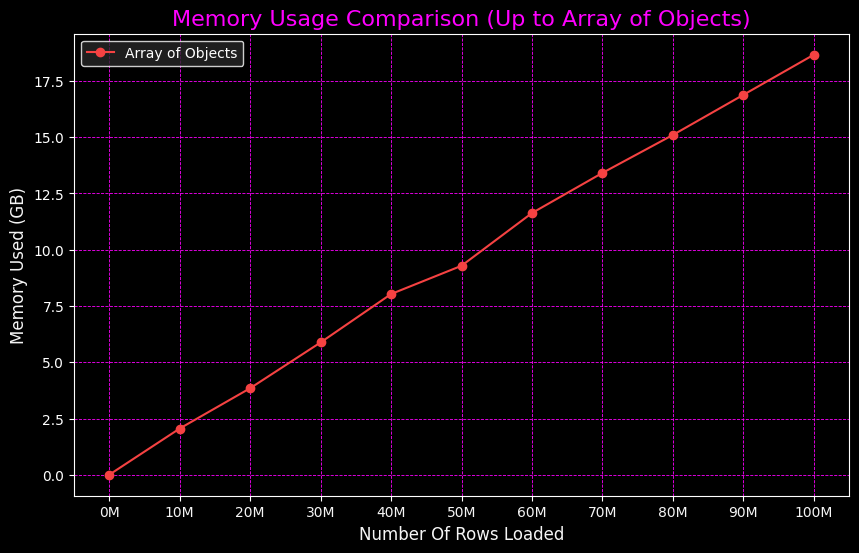

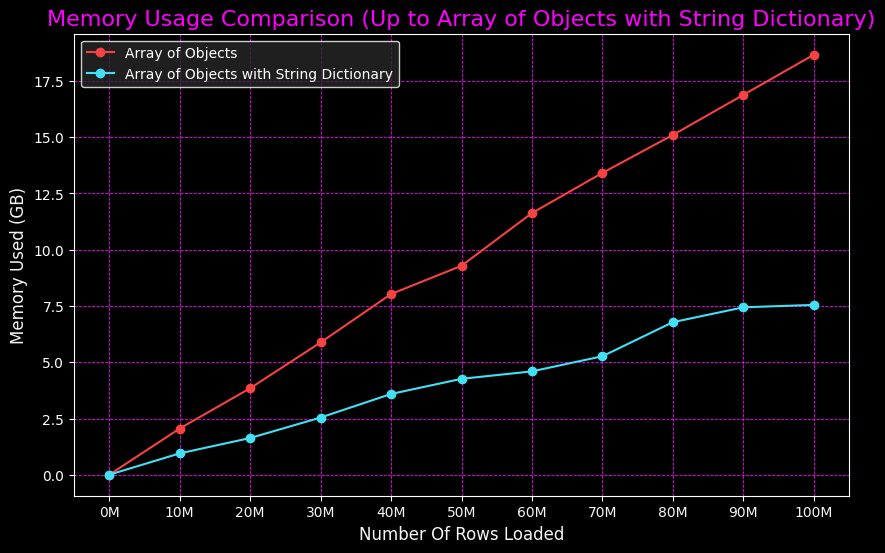

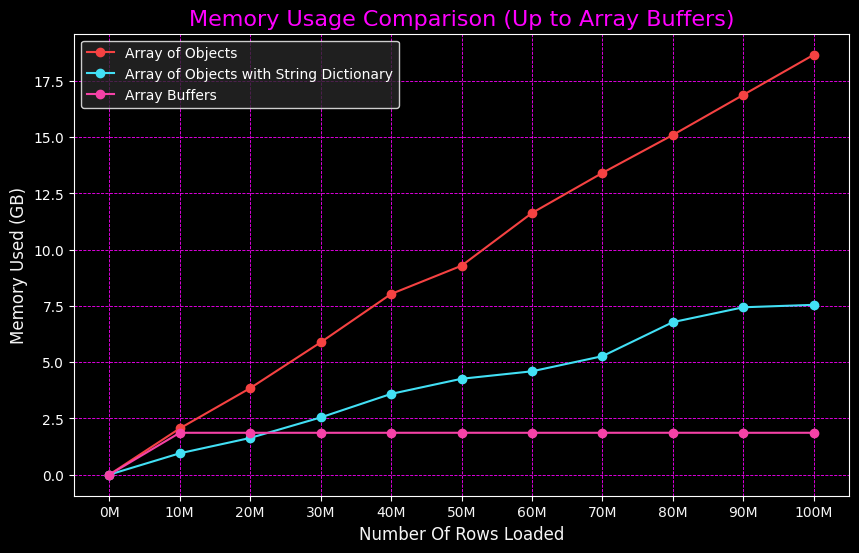

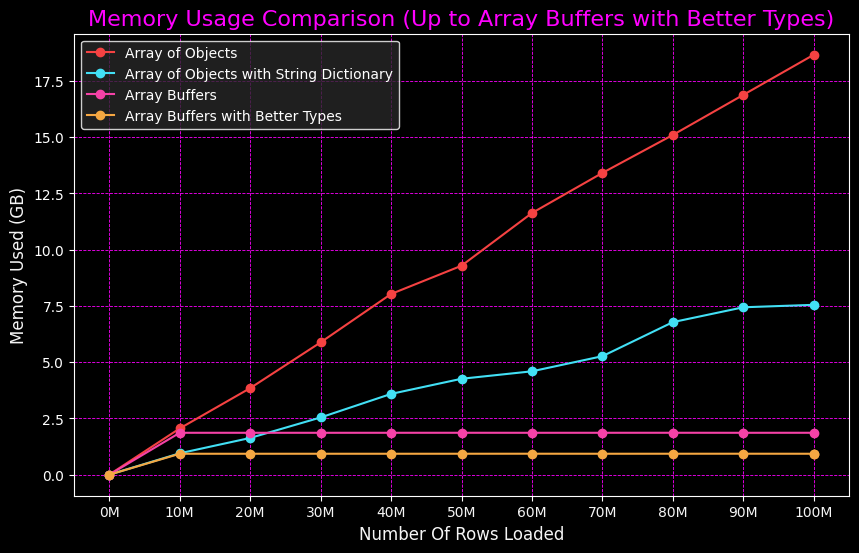

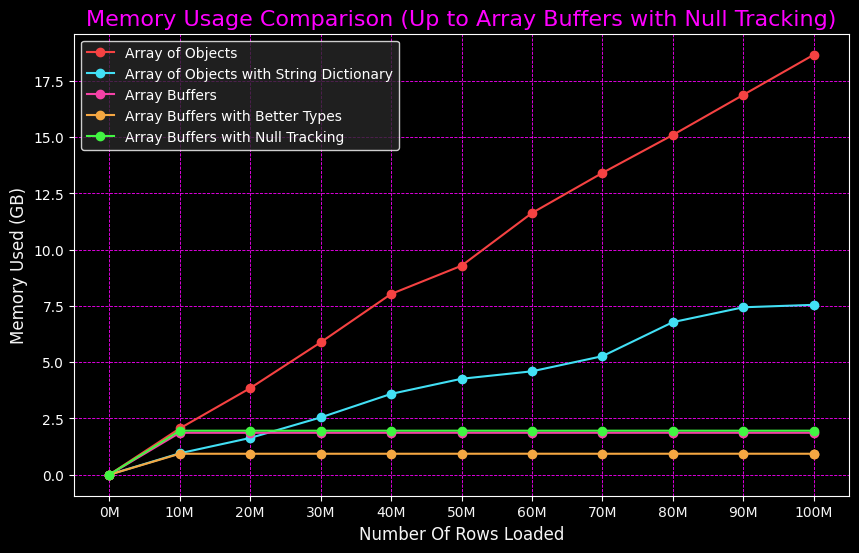

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV files
array_of_objects_df = pd.read_csv("/home/jack/code/df.ts/stats/arrayOfObjects_100000000.csv")
array_of_objects_string_dict_df = pd.read_csv("/home/jack/code/df.ts/stats/arrayOfObjectsStringDictionary_100000000.csv")
array_buffer_df = pd.read_csv("/home/jack/code/df.ts/stats/arrayBuffer_100000000.csv")
array_buffer_better_types_df = pd.read_csv("/home/jack/code/df.ts/stats/arrayBufferBetterTypes_100000000.csv")
array_buffer_with_null_tracking_df = pd.read_csv("/home/jack/code/df.ts/stats/arrayBufferWithNullTracking_100000000.csv")

# Convert 'heapUsed' from bytes to gigabytes and 'rows' to millions
array_of_objects_df['heapUsed_GB'] = array_of_objects_df['heapUsed'] / (1024 ** 3)
array_of_objects_df['rows_millions'] = array_of_objects_df['rows'] / 10_000_000

array_of_objects_string_dict_df['heapUsed_GB'] = array_of_objects_string_dict_df['heapUsed'] / (1024 ** 3)
array_of_objects_string_dict_df['rows_millions'] = array_of_objects_string_dict_df['rows'] / 10_000_000

array_buffer_df['arrayBuffers_GB'] = array_buffer_df['arrayBuffers'] / (1024 ** 3)
array_buffer_df['rows_millions'] = array_buffer_df['rows'] / 10_000_000

array_buffer_better_types_df['arrayBuffers_GB'] = array_buffer_better_types_df['arrayBuffers'] / (1024 ** 3)
array_buffer_better_types_df['rows_millions'] = array_buffer_better_types_df['rows'] / 10_000_000

array_buffer_with_null_tracking_df['arrayBuffers_GB'] = array_buffer_with_null_tracking_df['arrayBuffers'] / (1024 ** 3)
array_buffer_with_null_tracking_df['rows_millions'] = array_buffer_with_null_tracking_df['rows'] / 10_000_000

# Filter data to include only rows where 'rows_millions' is a whole number (multiples of 10 million)
array_of_objects_df = array_of_objects_df[array_of_objects_df['rows'] % 10_000_000 == 0]
array_of_objects_string_dict_df = array_of_objects_string_dict_df[array_of_objects_string_dict_df['rows'] % 10_000_000 == 0]
array_buffer_df = array_buffer_df[array_buffer_df['rows'] % 10_000_000 == 0]
array_buffer_better_types_df = array_buffer_better_types_df[array_buffer_better_types_df['rows'] % 10_000_000 == 0]
array_buffer_with_null_tracking_df = array_buffer_with_null_tracking_df[array_buffer_with_null_tracking_df['rows'] % 10_000_000 == 0]

# Apply Synthwave-style customizations
plt.style.use('dark_background')

# Define a list of datasets and their corresponding styles
datasets = [
    (array_of_objects_df, 'heapUsed_GB', '#f54242', 'Array of Objects'),
    (array_of_objects_string_dict_df, 'heapUsed_GB', '#42e0f5', 'Array of Objects with String Dictionary'),
    (array_buffer_df, 'arrayBuffers_GB', '#f542a7', 'Array Buffers'),
    (array_buffer_better_types_df, 'arrayBuffers_GB', '#f5a742', 'Array Buffers with Better Types'),
    (array_buffer_with_null_tracking_df, 'arrayBuffers_GB', '#42f542', 'Array Buffers with Null Tracking')
]

# Create a series of plots
for i, (df, y_col, color, label) in enumerate(datasets, start=1):
    plt.figure(figsize=(10, 6))

    # Plot the previous datasets
    for j in range(i):
        df_prev, y_col_prev, color_prev, label_prev = datasets[j]
        plt.plot(df_prev['rows_millions'], df_prev[y_col_prev], marker='o', linestyle='-', color=color_prev, label=label_prev)

    # Add labels and title
    plt.xlabel('Number Of Rows Loaded', fontsize=12, color='#f5f5f5')
    plt.ylabel('Memory Used (GB)', fontsize=12, color='#f5f5f5')
    plt.title(f'Memory Usage Comparison (Up to {label})', fontsize=16, color='#ff00ff')

    # Set x-axis ticks from 0 to 100 million rows
    plt.xticks(ticks=range(0, 11), labels=[f'{k*10}M' for k in range(11)], fontsize=10, color='#f5f5f5')

    # Add legend
    legend = plt.legend(loc='upper left', fontsize=10)
    legend.get_frame().set_edgecolor('#ffffff')
    legend.get_frame().set_facecolor('#282828')

    # Add grid
    plt.grid(True, which='both', color='#ff00ff', linestyle='--', linewidth=0.6)

    # Save each plot incrementally
    plt.savefig(f'/home/jack/code/df.ts/slides/memory_usage_comparison_step_{i}.png', dpi=300, bbox_inches='tight')

    # Display the plot
    plt.show()


In [11]:
chemicals_shipped_df = pd.read_parquet("/home/jack/code/df.ts/outputs/chemicals_shipped_100000000.parquet")
chemicals_shipped_df.head(20)

,chem_name,amount,shipper,shipped_at
0,Hydrochloric Acid,12.563627,Eco Shipping,820472400
1,Sodium Hydroxide,62.207409,Green Chemicals Ltd.,820472400
2,Chlorine,36.651134,Clean Planet,820472400
3,Ammonium Nitrate,54.670792,Eco Shipping,820472400
4,Hydrochloric Acid,61.377747,Green Chemicals Ltd.,820472400
5,Acetone,15.903427,Clean Planet,820472400
6,Sulfuric Acid,62.288658,Eco Shipping,820472400
7,Sodium Hydroxide,93.232701,Clean Planet,820472400
8,Hydrochloric Acid,0.762113,Green Chemicals Ltd.,820472400
9,Ethylene Glycol,97.229101,Green Chemicals Ltd.,820472400
